In [1]:
import pandas as pd

# 載入資料集

鐵達尼號資料集是一個CSV檔案：titanic_data.csv，我們可以建立DataFrame物件來載入資料集，如下所示：

In [2]:
titanic = pd.read_csv("titanic_data.csv")
titanic.shape

(1313, 6)

# 描述資料

In [3]:
titanic.head()

,PassengerId,Name,PClass,Age,Sex,Survived
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [4]:
titanic.describe()

,PassengerId,Age,Survived
count,1313.000000,756.000000,1313.000000
mean,657.000000,30.397989,0.342727
std,379.174762,14.259049,0.474802
min,1.000000,0.170000,0.000000
25%,329.000000,21.000000,0.000000
50%,657.000000,28.000000,0.000000
75%,985.000000,39.000000,1.000000
max,1313.000000,71.000000,1.000000


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1313 non-null   int64  
 1   Name         1313 non-null   object 
 2   PClass       1313 non-null   object 
 3   Age          756 non-null    float64
 4   Sex          1313 non-null   object 
 5   Survived     1313 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 61.7+ KB


# 資料前處理

在檢視資料集的描述資料後，我們知道目前需要處理的工作，如下所示：

1. PassengerId欄位是否是流水號，如果是，我們可以將此欄位改為索引欄位。
2. Sex欄位需要處理分類資料轉換成數值的0和1（1是女；0是男）。
3. PClass欄位需要處理分類資料轉換成數值的1、2和3（1是1st；2是2nd；3是3rd）。
4. Age欄位有很多遺漏值，我們準備使用Age欄位的平均值來補值。

In [6]:
import numpy as np

np.unique(titanic["PassengerId"].values).size

1313

In [7]:
titanic.set_index(["PassengerId"], inplace=True)
titanic.head()

,Name,PClass,Age,Sex,Survived
PassengerId,,,,,
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
5,"Allison, Master Hudson Trevor",1st,0.92,male,1


In [8]:
titanic["SexCode"] = np.where(titanic["Sex"]=="female", 1, 0)
titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode
PassengerId,,,,,,
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [9]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
titanic["PClass"] = label_encoder.fit_transform(titanic["PClass"])
titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode
PassengerId,,,,,,
1,"Allen, Miss Elisabeth Walton",1,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1,0.92,male,1,0


In [10]:
titanic.isnull().sum()

Name          0
PClass        0
Age         557
Sex           0
Survived      0
SexCode       0
dtype: int64

In [11]:
sum(titanic["Age"].isnull())

557

In [12]:
avg_age = titanic["Age"].mean()
titanic["Age"].fillna(avg_age, inplace=True)
sum(titanic["Age"].isnull())

0

In [13]:
titanic["Sex"].groupby(titanic["Sex"]).size()

Sex
female    462
male      851
Name: Sex, dtype: int64

In [14]:
titanic.groupby("Sex")["Age"].mean()

Sex
female    29.773637
male      30.736945
Name: Age, dtype: float64

# 探索性資料分析

In [15]:
titanic["Died"] = np.where(titanic["Survived"]==0, 1, 0)
titanic.head()

,Name,PClass,Age,Sex,Survived,SexCode,Died
PassengerId,,,,,,,
1,"Allen, Miss Elisabeth Walton",1,29.00,female,1,1,0
2,"Allison, Miss Helen Loraine",1,2.00,female,0,1,1
3,"Allison, Mr Hudson Joshua Creighton",1,30.00,male,0,0,1
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1,25.00,female,0,1,1
5,"Allison, Master Hudson Trevor",1,0.92,male,1,0,0


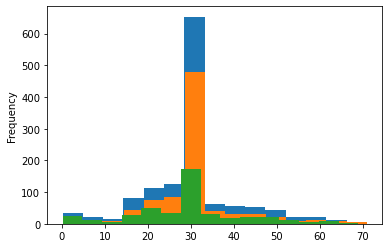

In [16]:
titanic["Age"].plot(kind="hist", bins=15)
df = titanic[titanic.Survived == 0]
df["Age"].plot(kind="hist", bins=15)
df = titanic[titanic.Survived == 1]
df["Age"].plot(kind="hist", bins=15)

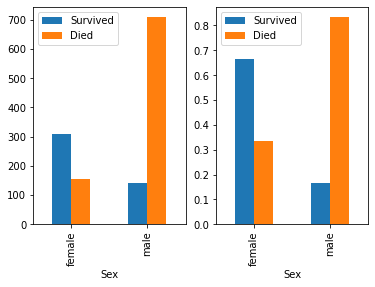

In [17]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2)
df = titanic[["Survived","Died"]].groupby(titanic["Sex"]).sum()
df.plot(kind="bar", ax=axes[0])
df = titanic[["Survived","Died"]].groupby(titanic["Sex"]).mean()
df.plot(kind="bar", ax=axes[1])

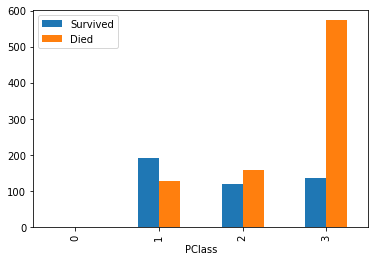

In [18]:
df = titanic[['Survived',"Died"]].groupby(titanic["PClass"]).sum()
df.plot(kind="bar")

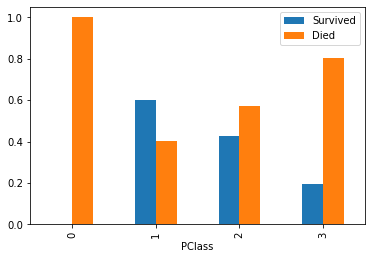

In [19]:
df = titanic[['Survived',"Died"]].groupby(titanic["PClass"]).mean()
df.plot(kind="bar")

In [20]:
df = titanic.drop("Died", axis=1)
df.corr()

,PClass,Age,Survived,SexCode
PClass,1.000000,-0.314649,-0.359128,-0.127776
Age,-0.314649,1.000000,-0.048236,-0.042546
Survived,-0.359128,-0.048236,1.000000,0.502891
SexCode,-0.127776,-0.042546,0.502891,1.000000
